In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv

Welcome to JupyROOT 6.26/04


In [2]:
#   list of runs
runlist = np.arange(63,64,1,dtype=int)

#  pre-set for pdf plot file name
prepdf="plotdir/plot_run"+str(runlist[0])+"_"
postpdf=".pdf"

#  output root histogram file
oname="histMuonAnalysis_Run"+str(runlist[0])+".root"
ofile=ROOT.TFile(oname,"RECREATE")

#  directory of input data file
csvdir="/Users/kunori/skdir/CAEN/dfiles/MuonDarkBox/"

# global valiables
totalEventCount=0
runEventCount=np.zeros(len(runlist))
h1={}
h2={}
hp={}


# Mapping
sipm2caen=np.array([61,63,32,34,29,31,0,2,
          59,57,38,36,27,25,6,4,
          53,55,40,42,21,23,8,10,
          51,49,46,44,19,17,14,12,
          45,47,48,50,13,15,16,18,
          43,41,54,52,11,9,22,20,
          37,39,56,58,5,7,24,26,
          35,33,62,60,3,1,30,28])

caen2sipm=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2sipm[sipm2caen[k]]=i

    
#  x:  left to right
#  y:  bottom to top
xy2caen=np.array([35,37,43,45,51,53,59,61,
                   33,39,41,47,49,55,57,63,
                   62,56,54,48,46,40,38,32,
                   60,58,52,50,44,42,36,34,
                   3,5,11,13,19,21,27,29,
                   1,7,9,15,17,23,25,31,
                   30,24,22,16,14,8,6,0,
                   28,26,20,18,12,10,4,2])

caen2xy=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2xy[xy2caen[k]]=i

        
print("caen2sipm",caen2sipm)
print("caen2xy",caen2xy)

#  mapping of SBar in Dark Box (3 in top, 3 in bottom)
topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

caen2sipm [ 6 61  7 60 15 52 14 53 22 45 23 44 31 36 30 37 38 29 39 28 47 20 46 21
 54 13 55 12 63  4 62  5  2 57  3 56 11 48 10 49 18 41 19 40 27 32 26 33
 34 25 35 24 43 16 42 17 50  9 51  8 59  0 58  1]
caen2xy [55 40 63 32 62 33 54 41 53 42 61 34 60 35 52 43 51 44 59 36 58 37 50 45
 49 46 57 38 56 39 48 47 23  8 31  0 30  1 22  9 21 10 29  2 28  3 20 11
 19 12 27  4 26  5 18 13 17 14 25  6 24  7 16 15]


In [3]:
def unpackData(row):
    rtcode=0
    BoardID=int(row[0])
    TStamp=float(row[1])
    
    LG=np.zeros(64)
    HG=np.zeros(64)
    TOA=np.zeros(64)
    TOT=np.zeros(64)
    data_type=np.zeros(64,dtype=int)
        
    i=4
    while i<len(row):
        chid=int(row[i])
        dtype=str(row[i+1])
        LG[chid]=float(row[i+2])
        HG[chid]=float(row[i+3])
        # print(chid,dtype,LG[chid],HG[chid])
        i=i+4
        if dtype == "0x3":
            TOA[chid]=0.0
            TOT[chid]=0.0
            data_type[chid]=1
        elif dtype == "0x13":
            TOA[chid]=float(row[i])
            TOT[chid]=0.0
            data_type[chid]=2
            i=i+1
        elif dtype == "0x33":
            TOA[chid]=float(row[i])
            TOT[chid]=float(row[i+1])
            data_type[chid]=3
            i=i+2
        else:
            data_type[chid]=4
            print("unpackData:  unkown data_type",dtype)
            rtcode=1
            break
        
    # print(BoardID,TStamp)
    return rtcode,TStamp,LG,HG,TOA,TOT,data_type
    
    

start analyzing Run 63
/Users/kunori/skdir/CAEN/dfiles/MuonDarkBox/Run63_list.csv
run 63  eventCount= 1  (orange: TOA tagged)


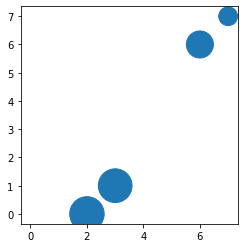

run 63  eventCount= 2  (orange: TOA tagged)


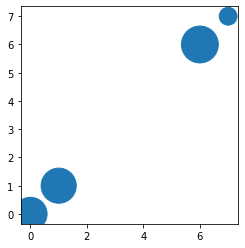

run 63  eventCount= 3  (orange: TOA tagged)


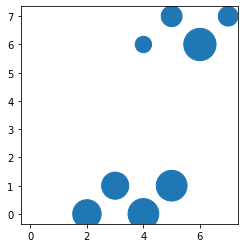

run 63  eventCount= 4  (orange: TOA tagged)


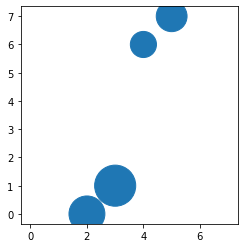

run 63  eventCount= 5  (orange: TOA tagged)


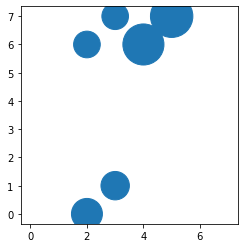

run 63  eventCount= 6  (orange: TOA tagged)


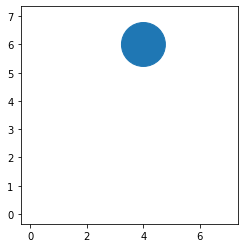

run 63  eventCount= 7  (orange: TOA tagged)


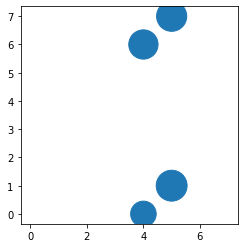

run 63  eventCount= 8  (orange: TOA tagged)


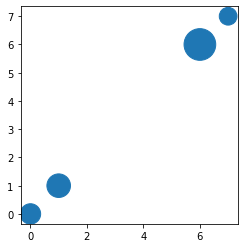

run 63  eventCount= 9  (orange: TOA tagged)


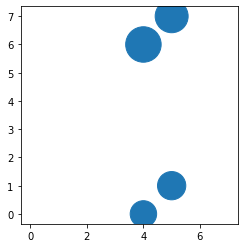

run 63  eventCount= 10  (orange: TOA tagged)


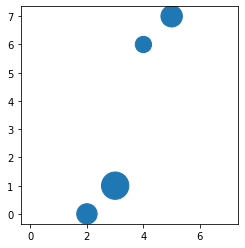

run 63  eventCount= 11  (orange: TOA tagged)


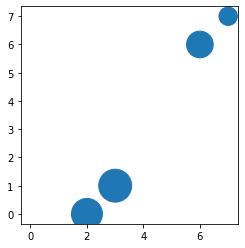

run 63  eventCount= 12  (orange: TOA tagged)


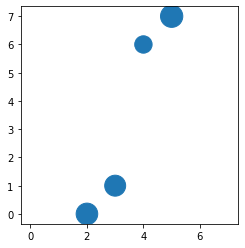

run 63  eventCount= 13  (orange: TOA tagged)


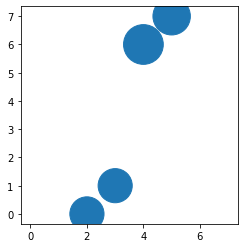

run 63  eventCount= 14  (orange: TOA tagged)


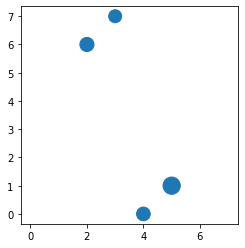

run 63  eventCount= 15  (orange: TOA tagged)


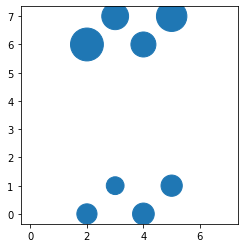

run 63  eventCount= 16  (orange: TOA tagged)


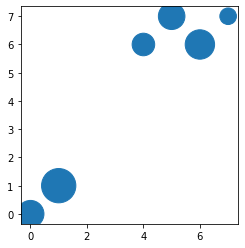

run 63  eventCount= 18  (orange: TOA tagged)


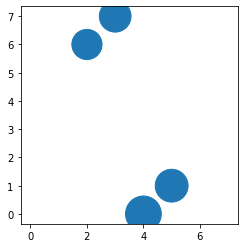

run 63  eventCount= 19  (orange: TOA tagged)


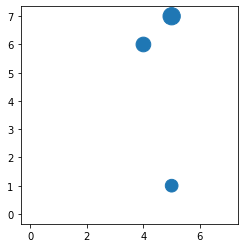

run 63  eventCount= 20  (orange: TOA tagged)


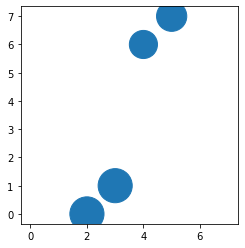

run 63  eventCount= 23  (orange: TOA tagged)


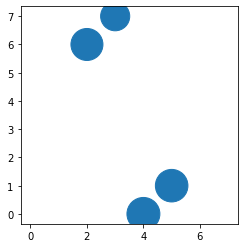

Run 63 ,   10451  events have been analyzed.

 Total events in this job 10451
for runs [63]


In [4]:
displayDone=0

def displayHits(run,eventCount,LG,TOA):
    global displayDone

    if displayDone>0:
        return
    displayDone=1   # set flag to avoid same event displayed multiple times.
    
    LGtemp=np.copy(LG)
    LGtemp[LGtemp>4000.0]=0.0
    LGtemp[LGtemp<120]=0.0   # v1=140
    LGmax=np.amax(LGtemp)
            
    LGtempTOA=np.copy(LG)
    for i in np.arange(0,64,1):
        if TOA[i]<0.1 or TOA[i]>50.0:
            LGtempTOA[i]=0.0  # reset value if TOA does no exist
    LGmaxTOA=np.amax(LGtempTOA)
    
    x=np.zeros(64)
    y=np.zeros(64)
    z=np.zeros(64)
    ztoa=np.zeros(64)
    for i in range(0,64):
        j=caen2xy[i]
        kx=int(j%8)
        ky=int(j/8)
        x[i]=float(kx)
        y[i]=float(ky)
        if LGtemp[i]<2000.0:
            z[i]=LGtemp[i] 
        if LGtempTOA[i]<2000.0:
            ztoa[i]=LGtempTOA[i]
    print("run",run," eventCount=",eventCount," (orange: TOA tagged)")
    plt.scatter(x,y,z)
    plt.scatter(x,y,ztoa)
    plt.gca().set_aspect('equal')
    plt.show()
    return

def defineHistograms():
    global ofile
    global h1,h2,hp
    
    s="ChID"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    s="ChID_dtype3"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    for run in runlist:
        s="EventID_dtype3_Run"+str(run)
        h1[s]=ROOT.TH1D(s,s,500,0.0,500.0)
 
    for i in range(0,6,1):
        s="pair_"+str(i)        
        h2[s]=ROOT.TH2D(s,s,100,0.0,2000.0,100,0.0,2000.0)
        
    s="sumLG"
    h1[s]=ROOT.TH1D(s,s,200,0.0,8000.0)
    s="topLG"
    h1[s]=ROOT.TH1D(s,s,200,0.0,8000.0)
    s="botLG"
    h1[s]=ROOT.TH1D(s,s,200,0.0,8000.0)

    s="data_type_all"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="data_type_max"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    
    for i in range(64):
        
        s="LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0) 
        s="toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,500,250.0,750.0)
        s="tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        
        s="a_LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,500,0.0,1000.0)
        s="a_HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,500,0.0,1000.0) 
        s="a_toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,100,450.0,550.0)
        s="a_tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,3000.0) 
        

    return

#   define all histograms here.
defineHistograms()


def fillHistograms(run,eventCount,LG,HG,TOA,TOT,data_type):
    global h1,h2,hp
    
    
    datatypemax=np.amax(data_type)
    h1["data_type_max"].Fill(datatypemax)
    
    if datatypemax==3:
        s="EventID_dtype3_Run"+str(run)
        h1[s].Fill(eventCount)
    

    # pairs of SBars
    sumLG=0.0
    topLG=0.0
    botLG=0.0
    for i in range(0,6,1):
        s="pair_"+str(i)
        k1=i*2
        k2=k1+1
        j1=topbottomMap[k1]
        j2=topbottomMap[k2]
        sumLG=sumLG+LG[j1]+LG[j2]
        if i<3:
            topLG=topLG+LG[j1]+LG[j2]
        if i>2:
            botLG=botLG+LG[j1]+LG[j2]
        # 2D plot            
        if LG[j1]>200.0 or LG[j2]>200.0:
            h2[s].Fill(LG[j1],LG[j2])
        # print("k1",k1,"k2",k2,"  LG[j1]",LG[j1],"  LG[j2]",LG[j2])

    h1["sumLG"].Fill(sumLG)
    h1["topLG"].Fill(topLG)
    h1["botLG"].Fill(botLG)

    for i in range(0,64):
        h1["data_type_all"].Fill(data_type[i])
        if data_type[i]==3:
            h1["ChID_dtype3"].Fill(i)
            
        s="HG_"+str(i)
        h1[s].Fill(HG[i])
        s="a_HG_"+str(i)
        h1[s].Fill(HG[i])
        
        s="LG_"+str(i)
        if LG[i]>200.0:
            h1[s].Fill(LG[i])
        s="a_LG_"+str(i)
        h1[s].Fill(LG[i])
        
        if TOA[i]>0.0:      
            s="toa_"+str(i)
            h1[s].Fill(TOA[i])
            s="a_toa_"+str(i)
            h1[s].Fill(TOA[i])

        if TOT[i]>0.0:
            s="tot_"+str(i)
            h1[s].Fill(TOT[i])
            s="a_tot_"+str(i)
            h1[s].Fill(TOT[i])
            
    #  return to caller.
    return
    

def analyzeRun(run):
    global displayDone
    global lastEventCount
    
    nhitDisplayMax=20
    nhitDisplay=0
    
    csvname=csvdir+"Run"+str(run)+"_list.csv"
    print("start analyzing Run",run)
    print(csvname)
    
    eventCount=0
    with open(csvname,"r") as csvfile:
        reader=csv.reader(csvfile)
        for ix, row in enumerate(reader):
            displayDone=0
            # print(ix,"  ",row)
            if ix<5:
                continue
                
            if ix>10000000:
                break
            eventCount=eventCount+1
            rtcode,TStamp,LG,HG,TOA,TOT,data_type=unpackData(row)
            if rtcode>0:
                print("return code from unpackData is ",rtcode," Abort this job.")
                break

            fillHistograms(run,eventCount,LG,HG,TOA,TOT,data_type)
            # analyzeTOA(run,eventCount,LG,HG,TOA,TOT,data_type)
            
            lgtemp=np.copy(LG)
            lgtemp[lgtemp>4000.0]=0.0
            lgtemp[lgtemp<120]=0.0   # v1=140
            lgmax=np.amax(lgtemp)
        
            if lgmax>200.0 and nhitDisplay<nhitDisplayMax:
                nhitDisplay=nhitDisplay+1
                displayHits(run,eventCount,LG,TOA)
    return eventCount
                
#  loop over all events to analyze.
nTotal=0
for ix,run in enumerate(runlist):
    eventCount= analyzeRun(run)
    runEventCount[ix]=eventCount
    nTotal=nTotal+eventCount
    print("Run",run,",  ",eventCount," events have been analyzed.")

    totalEventCount=nTotal
# write histograms to output root histogram file
print("\n Total events in this job",nTotal)
print("for runs",runlist)
#  ofile.Write()

# 8x8 display shows hits with amplitude > 120 ( >= 1 pe)

run list: [63]
 number of events: [10451.]
total events= 10451


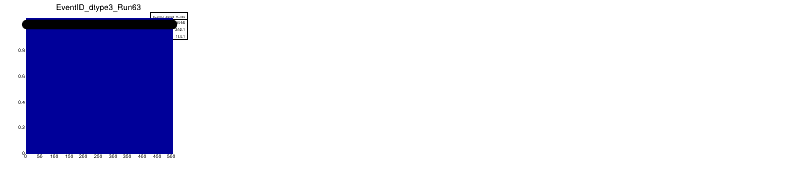

In [5]:
c11 = ROOT.TCanvas("c11","EventIDTOA",800,200)
nx=4
ny=int((len(runlist)-1)/nx)
ny=ny+1
c11.Divide(nx,ny)
print("run list:",runlist)
print(" number of events:",runEventCount)
print("total events=",totalEventCount)

for ix in range(len(runlist)):
    run=runlist[ix]
    k=ix+1
    c11.cd(k)
    s="EventID_dtype3_Run"+str(run)
    h1[s].Draw("")
    h1[s].SetMarkerStyle(0)
    
    ss="lastevent"+str(run)
    h1[ss]=h1[s].Clone(ss)
    h1[ss].Clear()
    x=float(runEventCount[ix])
    wt=float(0.3)
    h1[ss].Fill(x,wt)
    
    h1[ss].Draw("SAME")
    h1[ss].SetMarkerStyle(20)

c11.Draw()

pair: LG1 vs LG2, (cut if LG1<200  and LG2<200 )


Info in <TCanvas::Print>: pdf file plotdir/plot_run63_01_pairLG1LG2.pdf has been created


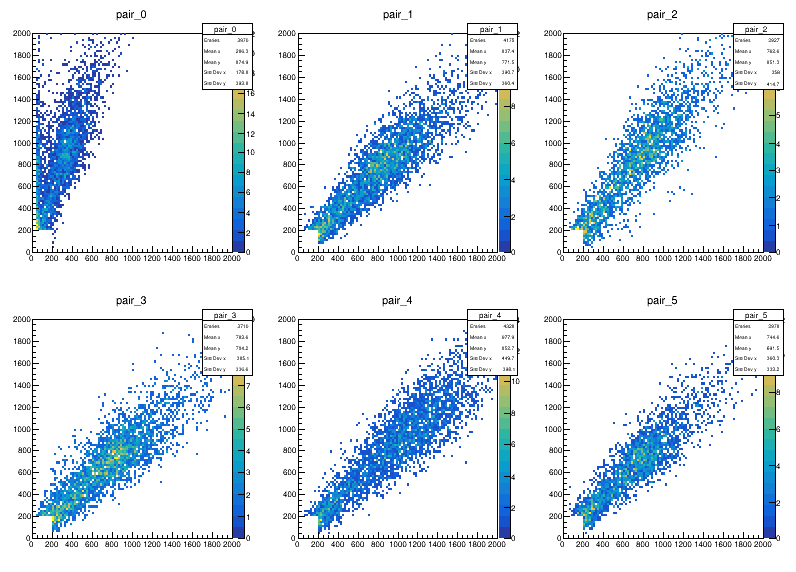

In [6]:
c1 = ROOT.TCanvas("c1","Pair",800,600)

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

c1.Divide(3,2)
for i in range(0,6,1):
    c1.cd(i+1)
    k1=i*2
    k2=k1+1
    s="pair_"+str(i)
    h2[s].Draw("COLZ")
c1.Draw()

pdfname=prepdf+"01_pairLG1LG2"+postpdf
c1.SaveAs(pdfname)

print("pair: LG1 vs LG2, (cut if LG1<200  and LG2<200 )")

sumLG


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_02_sumLG.pdf has been created


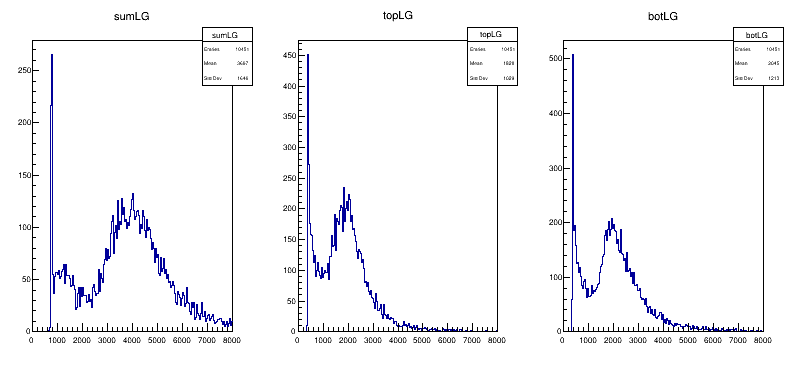

In [7]:
c1 = ROOT.TCanvas("c1","sumLG",800,400)

c1.Divide(3,1)
c1.cd(1)
h1["sumLG"].Draw()
c1.cd(2)
h1["topLG"].Draw()
c1.cd(3)
h1["botLG"].Draw()

c1.Draw()

pdfname=prepdf+"02_sumLG"+postpdf
c1.SaveAs(pdfname)

print("sumLG")

ix 0 i 2
ix 1 i 6
ix 2 i 10
ix 3 i 14
ix 4 i 18
ix 5 i 22
ix 6 i 55
ix 7 i 51
ix 8 i 47
ix 9 i 43
ix 10 i 39
ix 11 i 35
a_HG


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_03_a_HG.pdf has been created


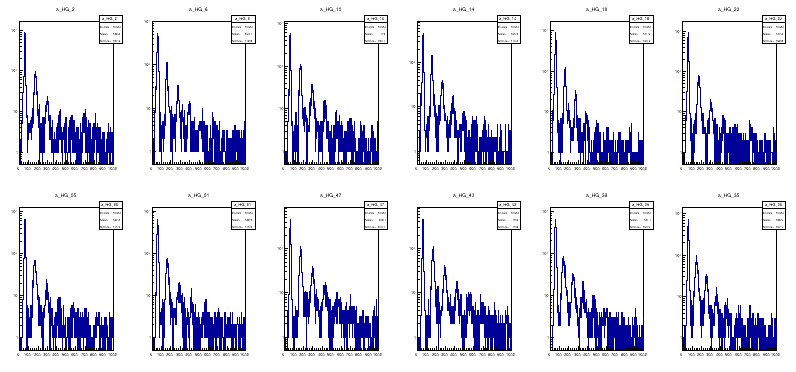

In [8]:
c1 = ROOT.TCanvas("c1","HG",800,400)

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

c1.Divide(6,2)
for ix,i in enumerate(topbottomMap):
    print("ix",ix,"i",i)
    c1.cd(ix+1)
    c1.GetPad(ix+1).SetLogy()
    s="a_HG_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"03_a_HG"+postpdf
c1.SaveAs(pdfname)

print("a_HG")

TOA


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_04_TOA.pdf has been created


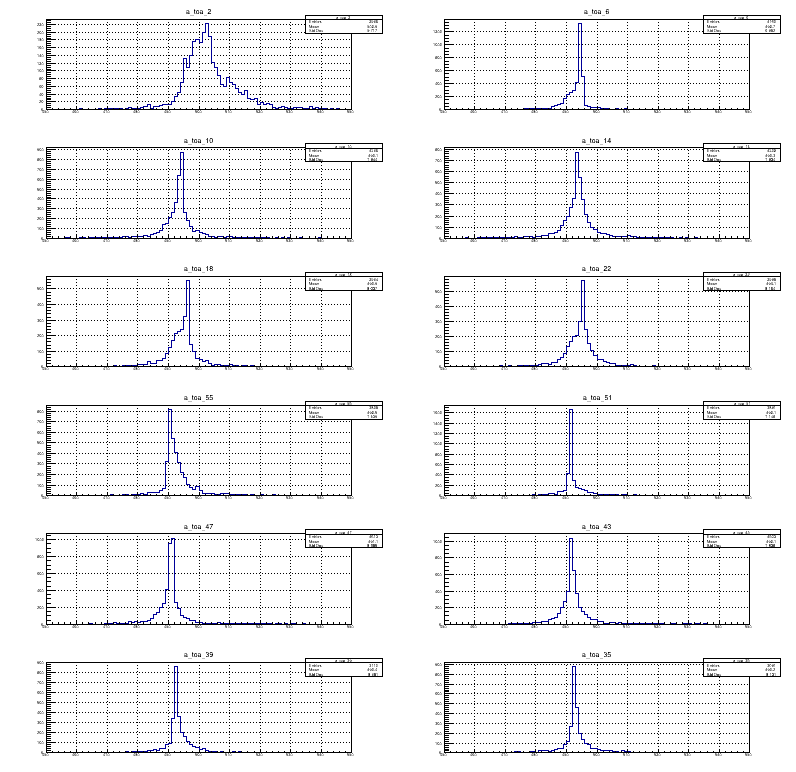

In [9]:
c1 = ROOT.TCanvas("c1","LG",800,800)
c1.SetGrid()

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

c1.Divide(2,6)
for ix,i in enumerate(topbottomMap):
    c1.cd(ix+1)
    ROOT.gPad.SetGrid()
    # c1.GetPad(ix+1).SetLogy()
    s="a_toa_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"04_TOA"+postpdf
c1.SaveAs(pdfname)

print("TOA")

HG


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_05_HG.pdf has been created


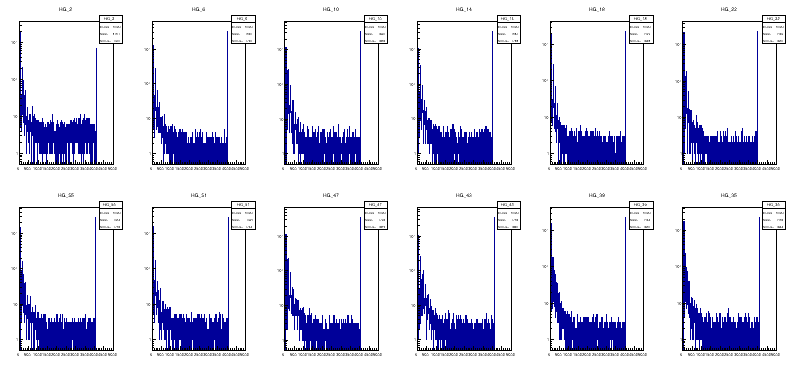

In [10]:
c1 = ROOT.TCanvas("c1","HG",800,400)

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

c1.Divide(6,2)
for ix,i in enumerate(topbottomMap):
    c1.cd(ix+1)
    c1.GetPad(ix+1).SetLogy()
    s="HG_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"05_HG"+postpdf
c1.SaveAs(pdfname)

print("HG")

LG


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_06_LG.pdf has been created


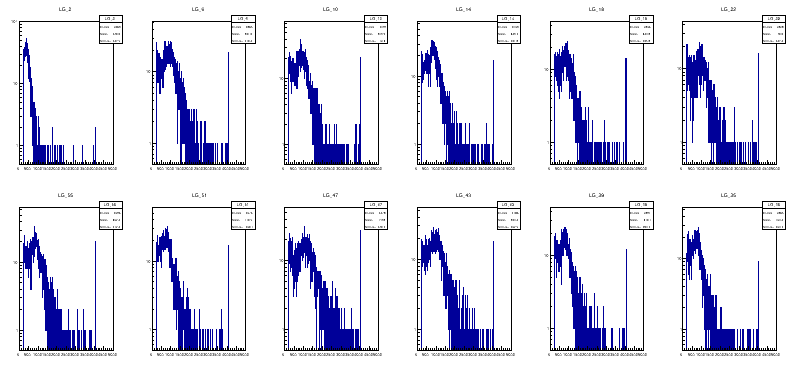

In [11]:
c1 = ROOT.TCanvas("c1","LG",800,400)

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

print("LG")

c1.Divide(6,2)
for ix,i in enumerate(topbottomMap):
    c1.cd(ix+1)
    c1.GetPad(ix+1).SetLogy()
    s="LG_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"06_LG"+postpdf
c1.SaveAs(pdfname)

a_LG > 200


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file plotdir/plot_run63_07_a_LG.pdf has been created


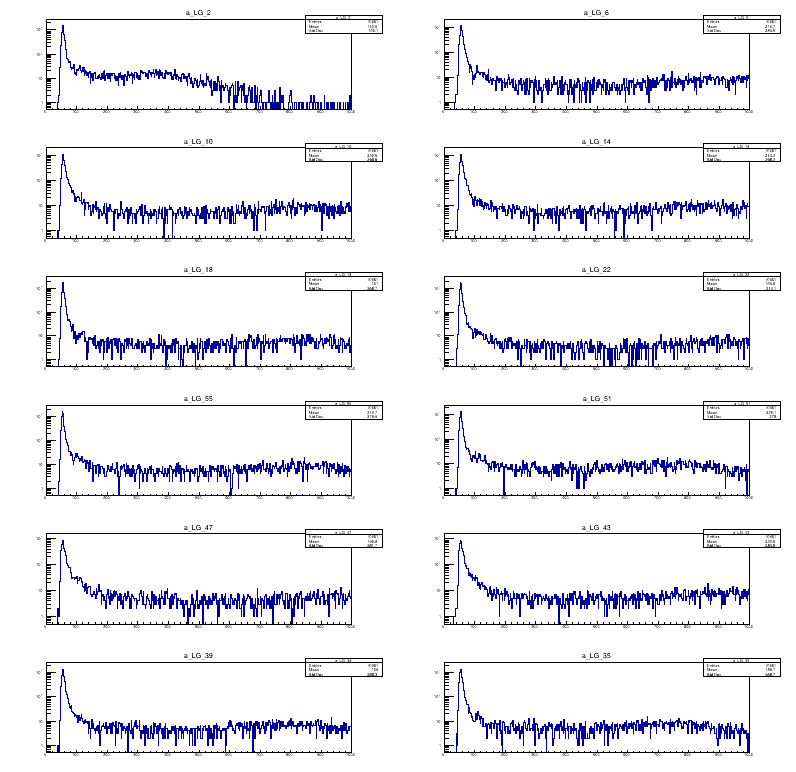

In [12]:
c1 = ROOT.TCanvas("c1","LG",800,800)

topbottomMap=[2,6,10,14,18,22,55,51,47,43,39,35]

c1.Divide(2,6)
for ix,i in enumerate(topbottomMap):
    c1.cd(ix+1)
    c1.GetPad(ix+1).SetLogy()
    s="a_LG_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"07_a_LG"+postpdf
c1.SaveAs(pdfname)

print("a_LG > 200")

In [13]:
ofile.Write()
ofile.Close()